In [2]:
#!pip install --upgrade google-api-python-client
#!pip install oauth2client

from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from oauth2client.tools import argparser

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import apikey

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings('ignore')

In [3]:
dev_key = apikey.api_key
api_service_name = "youtube"
api_ver = "v3"

In [4]:
youtube = build(api_service_name, api_ver, developerKey = dev_key)

In [5]:
search_response = youtube.search().list(
    q = "Í≥µÎ∂ÄÌïòÎäîÏÑ≠Ïù¥",
    order = "relevance",
    part = "snippet",
    maxResults = 50
    ).execute()

In [6]:
channel_id = search_response['items'][0]['id']['channelId']

In [7]:
playlists = youtube.playlists().list(
    channelId = channel_id,
    part = "snippet",
    maxResults = 20
    ).execute()

In [8]:
import pandas as pd

ids=[]
titles=[]
for i in playlists['items']:
    ids.append(i['id'])
    titles.append(i['snippet']['title'])
    
df=pd.DataFrame([ids,titles]).T
df.columns=['PlayLists','Titles']

df.head(5)

PlayLists       Titles
0  PLfkfgvn_kFAU6nfQ-zL_JV8D_SWeHVuRV       Shorts
1  PLfkfgvn_kFAX8jvsuRcoFp6CFPAUehok8      ÏùºÏÉÅ Vlog
2  PLfkfgvn_kFAV4YksRjqGU_H9dWmMRylSG  Q&A / Ï†ïÎ≥¥ Ï†úÍ≥µ

In [9]:
#Videos' list
dtcu=df['PlayLists'][0]
playlist_videos=youtube.playlistItems().list(
    playlistId=dtcu,
    part='snippet',
    maxResults=50)

playlistitems_list_response=playlist_videos.execute()

video_names=[]
video_ids=[]
date=[]

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])
    
vdf=pd.DataFrame([date,video_names,video_ids]).T
vdf.columns=['Date','Title','IDS']
vdf['ListNo'] = 1
vdf.head(5)

Date                                         Title  \
0  2022-08-20T20:27:40Z               ÌïúÍµ≠ ÏùåÏãùÏù¥ ÎÑàÎ¨¥ Í∑∏Î¶¨Ïö¥(?) ÎØ∏Íµ≠ Ïú†ÌïôÏÉù #shorts   
1  2022-08-20T20:27:40Z                         ÎØ∏Íµ≠ÏóêÏÑú Î≥¥ÎÇ¥Îäî Ï≤´ ÏÉùÏùº #Shorts   
2  2022-08-20T20:27:40Z                         ÎßõÏù¥ Í∞ÄÎ≤ÑÎ¶∞ ÌÖçÏÇ¨Ïä§ ÎÇ†Ïî® #shorts   
3  2022-08-20T20:27:40Z                  ÏÉàÌï¥Î•º ÎßûÏù¥ÌïòÎäî Í≤åÏúºÎ•∏ Ïú†ÌïôÏÉùÏùò ÏûêÏÑ∏ #Shorts   
4  2022-08-20T20:27:40Z  #Shorts Merry Christmas! ÎØ∏Íµ≠ Ïú†ÌïôÏÉùÏù¥ ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Ï¶êÍ∏∞Îäî Î≤ï   

           IDS  ListNo  
0  EQ4xjclxig0       1  
1  AA2ls2fBwdU       1  
2  o12WipNjpwM       1  
3  RqM5xtkC5HM       1  
4  uTeI3PZPAD0       1

In [10]:
dtcu2=df['PlayLists'][1]
playlist_videos=youtube.playlistItems().list(
    playlistId=dtcu2,
    part='snippet',
    maxResults=50)

playlistitems_list_response=playlist_videos.execute()

video_names=[]
video_ids=[]
date=[]

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])
    
vdf2=pd.DataFrame([date,video_names,video_ids]).T
vdf2.columns=['Date','Title','IDS']
vdf2['ListNo'] = 2
vdf2.head(5)

Date                                              Title  \
0  2022-08-20T20:26:52Z                      ÎØ∏Íµ≠ ÎåÄÌïôÏõêÏÉù Ïó¨Î¶ÑÌïôÍ∏∞ ÏùºÏÉÅ Vlog - Î≤åÏç® 1ÎÖÑ?   
1  2022-08-20T20:26:52Z         ÎØ∏Íµ≠ Ïù∏ÌÑ¥ Íµ¨Î•¥Îäî Vlog - Î≥∏Í≤© ÏòàÎπÑ Ïô∏ÎÖ∏Ïûê(ÎêòÍ≥†Ïã∂Îã§)Ïùò ÎØ∏Íµ≠ ÌöåÏÇ¨ Ï≤¥Ìóò   
2  2022-08-20T20:26:52Z        Ïó¨Î¶ÑÎ∞©Ìïô ÎßûÏïÑ Ìëπ ÏÇ∂ÏïÑÏßÑ(?) ÎØ∏Íµ≠ ÎåÄÌïôÏõêÏÉù Vlog - Ïùë Î™∞Îùº ÏùºÎã® Ïâ¥Í±∞Ïïº   
3  2022-08-20T20:26:52Z  Í∏∞ÎßêÍ≥†ÏÇ¨ÍπåÏßÄ Ïö∞ÎãπÌÉïÌÉï ÏπòÎ•∏ ÎØ∏Íµ≠ ÎåÄÌïôÏõêÏÉù Vlog - Ïù¥Í≤®ÎÇ¥Îäî Í≤ÉÏù¥ ÏïÑÎãàÎùº Î≤ÑÌã∞Îäî Í≤ÉÏù¥Îã§   
4  2022-08-20T20:26:52Z          Îòê Ï≤´ ÌïôÍ∏∞ Ïñ¥Ï∞åÏ†ÄÏ∞å Î≥¥ÎÇ∏ ÎØ∏Íµ≠ ÎåÄÌïôÏõêÏÉù Vlog - Îã¨ÎùºÏßÄÍ∏∞ ÏúÑÌïú ÎÇòÎÇ†Îì§   

           IDS  ListNo  
0  fLA0abcqyTE       2  
1  aBtYmx-AhlU       2  
2  frxWAxQvPcw       2  
3  5TQPtOVdr9Y       2  
4  am2TFveOX08       2

In [11]:
dtcu3=df['PlayLists'][2]
playlist_videos=youtube.playlistItems().list(
    playlistId=dtcu3,
    part='snippet',
    maxResults=50)

playlistitems_list_response=playlist_videos.execute()

video_names=[]
video_ids=[]
date=[]

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])
    
vdf3=pd.DataFrame([date,video_names,video_ids]).T
vdf3.columns=['Date','Title','IDS']
vdf3['ListNo'] = 3

In [12]:
# Appending all lists into one single dataframe and reset the index to aviod index duplication
tdf = vdf.append(vdf2)
tdf = tdf.append(vdf3)
tdf.reset_index(inplace=True, drop=True)
len(tdf)

33

In [13]:
# Dislike count value has been removed according to Youtube's policy of not exposing the count of dislike.

import re

category_id=[]
views=[]
likes=[]
comments=[]
mins=[]
seconds=[]
title=[]
date=[]
hours=[]
mins=[]
secs=[]

for u in range(len(tdf)):
    request=youtube.videos().list(
    part='snippet,contentDetails,statistics',
    id=tdf['IDS'][u])
    
    response=request.execute()
    
    if response['items']==[]:
        ids.append('-')
        category_id.append('-')
        views.append('-')
        likes.append('-')
        comments.append('-')
        date.append('-')
        hours.append('-')
        mins.append('-')
        secs.append('-')
        
    else :
        title.append(response['items'][0]['snippet']['title'])
        category_id.append(response['items'][0]['snippet']['categoryId'])
        views.append(response['items'][0]['statistics']['viewCount'])
        likes.append(response['items'][0]['statistics']['likeCount'])
        comments.append(response['items'][0]['statistics']['commentCount'])
        date.append(response['items'][0]['snippet']['publishedAt'])
        
        duration = re.findall(r'\d+', response['items'][0]['contentDetails']['duration'])
        if len(duration) == 3:
            hours.append(duration[0])
            mins.append(duration[1])
            secs.append(duration[2])
        elif len(duration) == 2:
            hours.append('-')
            mins.append(duration[0])
            secs.append(duration[1])
        else:
            hours.append('-')
            mins.append('-')
            secs.append(duration[0])
        
dtcu_df=pd.DataFrame([title,category_id,views,likes,comments,date,hours,mins,secs]).T
dtcu_df.columns=['title','category_id','views','likes','comments','date', 'hour', 'min', 'sec']
dtcu_df['IDS'] = tdf['IDS']
#dtcu_df.head(5)

In [50]:
# Sorted lists merging - validation checked
dtcu_df['cat_clean'] = 0
for i in range(len(tdf)):
    if tdf['Title'][i] == dtcu_df['title'][i]:
        dtcu_df['cat_clean'][i] = tdf['ListNo'][i]
dtcu_df.head(5)

title category_id views likes  \
0               ÌïúÍµ≠ ÏùåÏãùÏù¥ ÎÑàÎ¨¥ Í∑∏Î¶¨Ïö¥(?) ÎØ∏Íµ≠ Ïú†ÌïôÏÉù #shorts          22   693    17   
1                         ÎØ∏Íµ≠ÏóêÏÑú Î≥¥ÎÇ¥Îäî Ï≤´ ÏÉùÏùº #Shorts          22   390    32   
2                         ÎßõÏù¥ Í∞ÄÎ≤ÑÎ¶∞ ÌÖçÏÇ¨Ïä§ ÎÇ†Ïî® #shorts          27   332    14   
3                  ÏÉàÌï¥Î•º ÎßûÏù¥ÌïòÎäî Í≤åÏúºÎ•∏ Ïú†ÌïôÏÉùÏùò ÏûêÏÑ∏ #Shorts          27   269    11   
4  #Shorts Merry Christmas! ÎØ∏Íµ≠ Ïú†ÌïôÏÉùÏù¥ ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Ï¶êÍ∏∞Îäî Î≤ï          27   318    15   

  comments                 date hour min sec          IDS  cat_clean weekday  \
0       14  2022-08-10 00:00:00    0   0  34  EQ4xjclxig0          1     Wed   
1       14  2022-06-08 00:00:00    0   0   1  AA2ls2fBwdU          1     Wed   
2        2  2022-04-05 00:00:00    0   0   1  o12WipNjpwM          1     Tue   
3        6  2022-01-08 00:00:00    0   1   9  RqM5xtkC5HM          1     Sat   
4        3  2021-12-25 00:00:00    0   0  58  uTeI3PZPAD0          1     Sat   

   total_secs  
0          34  
1           1  
2           1  
3           9  
4          58

## Data Glancing

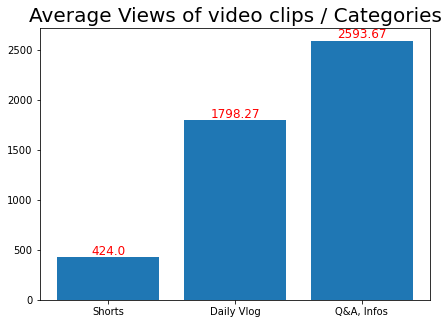

In [15]:
# Labeling
# Cat1 = Shorts
# Cat2 = Daily Vlog
# Cat3 = Q&A, Infos

cal_1 = dtcu_df[dtcu_df['cat_clean'] == 1]
cal_2 = dtcu_df[dtcu_df['cat_clean'] == 2]
cal_3 = dtcu_df[dtcu_df['cat_clean'] == 3]

comp1 = pd.to_numeric(cal_1[['category_id', 'views']].views).mean()
comp2 = pd.to_numeric(cal_2[['category_id', 'views']].views).mean()
comp3 = pd.to_numeric(cal_3[['category_id', 'views']].views).mean()
compf = [round(comp1, 2), round(comp2, 2), round(comp3, 2)]
#compf

plt.figure(figsize=(7, 5))
x = np.arange(3)
cat_label = ['Shorts', 'Daily Vlog', 'Q&A, Infos']

plt.bar(x, compf)
plt.xticks(x, cat_label)

for i, v in enumerate(x):
    plt.text(v, compf[i], str(compf[i]),
             fontsize=12,
             color="red",
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title('Average Views of video clips / Categories', fontsize=20)
plt.show()

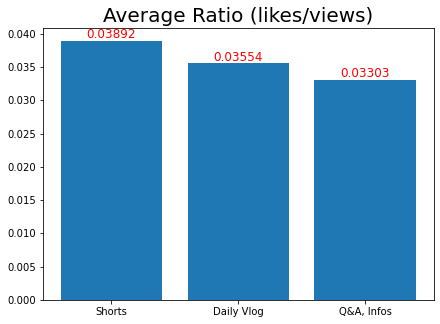

In [16]:
# Labeling
# Cat1 = Shorts
# Cat2 = Daily Vlog
# Cat3 = Q&A, Infos

# Ratio of views/likes

comp1 = pd.to_numeric(cal_1[['category_id', 'views', 'likes']].likes).mean()/pd.to_numeric(cal_1[['category_id', 'views', 'likes']].views).mean()
comp2 = pd.to_numeric(cal_2[['category_id', 'views', 'likes']].likes).mean()/pd.to_numeric(cal_2[['category_id', 'views', 'likes']].views).mean()
comp3 = pd.to_numeric(cal_3[['category_id', 'views', 'likes']].likes).mean()/pd.to_numeric(cal_3[['category_id', 'views', 'likes']].views).mean()
compf = [round(comp1, 5), round(comp2, 5), round(comp3, 5)]

plt.figure(figsize=(7, 5))
x = np.arange(3)
cat_label = ['Shorts', 'Daily Vlog', 'Q&A, Infos']

plt.bar(x, compf)
plt.xticks(x, cat_label)

for i, v in enumerate(x):
    plt.text(v, compf[i], str(compf[i]),
             fontsize=12,
             color="red",
             horizontalalignment='center',
             verticalalignment='bottom')
    
plt.title('Average Ratio (likes/views)', fontsize=20)
plt.show()

In [17]:
from datetime import datetime, date

dtcu_df['weekday'] = 0
dtcu_dfw = dtcu_df
dateDict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

for i in range(len(dtcu_df)):
    dtcu_dfw['date'][i] = (dtcu_df['date'][i][:10])
    dtcu_dfw['date'][i] = datetime.strptime(dtcu_df['date'][i], '%Y-%m-%d')
    dtcu_dfw['weekday'][i] = dtcu_df['date'][i].weekday()
    dtcu_dfw['weekday'][i] = dateDict[dtcu_df['weekday'][i]]
    
dtcu_dfw.head(5)

title category_id views likes  \
0               ÌïúÍµ≠ ÏùåÏãùÏù¥ ÎÑàÎ¨¥ Í∑∏Î¶¨Ïö¥(?) ÎØ∏Íµ≠ Ïú†ÌïôÏÉù #shorts          22   693    17   
1                         ÎØ∏Íµ≠ÏóêÏÑú Î≥¥ÎÇ¥Îäî Ï≤´ ÏÉùÏùº #Shorts          22   390    32   
2                         ÎßõÏù¥ Í∞ÄÎ≤ÑÎ¶∞ ÌÖçÏÇ¨Ïä§ ÎÇ†Ïî® #shorts          27   332    14   
3                  ÏÉàÌï¥Î•º ÎßûÏù¥ÌïòÎäî Í≤åÏúºÎ•∏ Ïú†ÌïôÏÉùÏùò ÏûêÏÑ∏ #Shorts          27   269    11   
4  #Shorts Merry Christmas! ÎØ∏Íµ≠ Ïú†ÌïôÏÉùÏù¥ ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Ï¶êÍ∏∞Îäî Î≤ï          27   318    15   

  comments                 date hour min sec          IDS  cat_clean weekday  
0       14  2022-08-10 00:00:00    -   -  34  EQ4xjclxig0          1     Wed  
1       14  2022-06-08 00:00:00    -   -   1  AA2ls2fBwdU          1     Wed  
2        2  2022-04-05 00:00:00    -   -   1  o12WipNjpwM          1     Tue  
3        6  2022-01-08 00:00:00    -   1   9  RqM5xtkC5HM          1     Sat  
4        3  2021-12-25 00:00:00    -   -  58  uTeI3PZPAD0          1     Sat

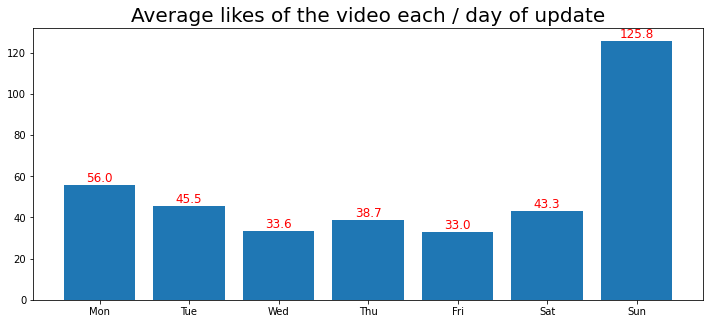

In [18]:
cal_1 = dtcu_dfw[dtcu_df['weekday'] == 'Mon']
cal_2 = dtcu_dfw[dtcu_df['weekday'] == 'Tue']
cal_3 = dtcu_dfw[dtcu_df['weekday'] == 'Wed']
cal_4 = dtcu_dfw[dtcu_df['weekday'] == 'Thu']
cal_5 = dtcu_dfw[dtcu_df['weekday'] == 'Fri']
cal_6 = dtcu_dfw[dtcu_df['weekday'] == 'Sat']
cal_7 = dtcu_dfw[dtcu_df['weekday'] == 'Sun']

comp1 = pd.to_numeric(cal_1[['views', 'likes', 'weekday']].likes).sum()/len(cal_1)
comp2 = pd.to_numeric(cal_2[['views', 'likes', 'weekday']].likes).sum()/len(cal_2) 
comp3 = pd.to_numeric(cal_3[['views', 'likes', 'weekday']].likes).sum()/len(cal_3)
comp4 = pd.to_numeric(cal_4[['views', 'likes', 'weekday']].likes).sum()/len(cal_4)
comp5 = pd.to_numeric(cal_5[['views', 'likes', 'weekday']].likes).sum()/len(cal_5)
comp6 = pd.to_numeric(cal_6[['views', 'likes', 'weekday']].likes).sum()/len(cal_6)
comp7 = pd.to_numeric(cal_7[['views', 'likes', 'weekday']].likes).sum()/len(cal_7)
compf = [round(comp1, 1), round(comp2, 1), round(comp3, 1), round(comp4, 1), round(comp5, 1), round(comp6, 1), round(comp7, 1)]
#compf

plt.figure(figsize=(12, 5))
x = np.arange(7)
cat_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.bar(x, compf)
plt.xticks(x, cat_label)

for i, v in enumerate(x):
    plt.text(v, compf[i], str(compf[i]),
             fontsize=12,
             color="red",
             horizontalalignment='center',
             verticalalignment='bottom')
    
plt.title('Average likes of the video each / day of update', fontsize=20)
plt.show()

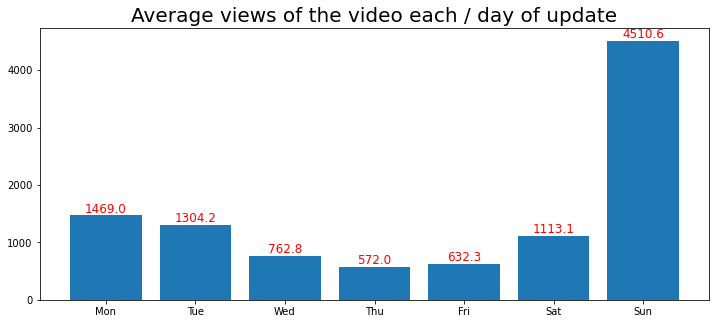

In [19]:
comp1 = pd.to_numeric(cal_1[['views', 'likes', 'weekday']].views).sum()/len(cal_1)
comp2 = pd.to_numeric(cal_2[['views', 'likes', 'weekday']].views).sum()/len(cal_2) 
comp3 = pd.to_numeric(cal_3[['views', 'likes', 'weekday']].views).sum()/len(cal_3)
comp4 = pd.to_numeric(cal_4[['views', 'likes', 'weekday']].views).sum()/len(cal_4)
comp5 = pd.to_numeric(cal_5[['views', 'likes', 'weekday']].views).sum()/len(cal_5)
comp6 = pd.to_numeric(cal_6[['views', 'likes', 'weekday']].views).sum()/len(cal_6)
comp7 = pd.to_numeric(cal_7[['views', 'likes', 'weekday']].views).sum()/len(cal_7)
compf = [round(comp1, 1), round(comp2, 1), round(comp3, 1), round(comp4, 1), round(comp5, 1), round(comp6, 1), round(comp7, 1)]
#compf

plt.figure(figsize=(12, 5))
x = np.arange(7)
cat_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.bar(x, compf)
plt.xticks(x, cat_label)

for i, v in enumerate(x):
    plt.text(v, compf[i], str(compf[i]),
             fontsize=12,
             color="red",
             horizontalalignment='center',
             verticalalignment='bottom')
    
plt.title('Average views of the video each / day of update', fontsize=20)
plt.show()

## Calculation of duration(Video clips) and finding correlation

In [57]:
# Duration Pre-processing
for i in range(len(dtcu_df)):
    if dtcu_df['min'][i] == '-':
        dtcu_df['min'][i] = 0
    if dtcu_df['hour'][i] == '-':
        dtcu_df['hour'][i] = 0

# Manual Update for Shorts issue
dtcu_df['min'][1] = 1
dtcu_df['min'][2] = 1
dtcu_df['min'][7] = 1
#dtcu_df

In [58]:
dtcu_df['total_secs'] = 0

dtcu_df['total_secs'] = pd.to_numeric(dtcu_df['sec'])
dtcu_df['total_secs'] = dtcu_df['total_secs'] + pd.to_numeric(dtcu_df['min'])*60
dtcu_df['total_secs'] = dtcu_df['total_secs'] + pd.to_numeric(dtcu_df['hour'])*3600
#dtcu_df['total_secs']
#pd.to_numeric(dtcu_df_temp['min'])*60

In [83]:
# Labeling
# Cat1 = Shorts
# Cat2 = Daily Vlog
# Cat3 = Q&A, Infos

# Ratio of activities/length
dtcu_df_temp = dtcu_df
dtcu_df_temp['rep_len'] = 0
dtcu_df_temp['like_len'] = 0
dtcu_df_temp['view_len'] = 0

dtcu_df_temp['rep_len'] = round(pd.to_numeric(dtcu_df_temp['comments'])/dtcu_df_temp['total_secs'], 4)
dtcu_df_temp['like_len'] = round(pd.to_numeric(dtcu_df_temp['likes'])/dtcu_df_temp['total_secs'], 4)
dtcu_df_temp['view_len'] = round(pd.to_numeric(dtcu_df_temp['views'])/dtcu_df_temp['total_secs'], 4)

cat1_comp = [
        round(dtcu_df_temp[dtcu_df_temp['cat_clean'] == 1]['rep_len'].mean(), 4),
        round(dtcu_df_temp[dtcu_df_temp['cat_clean'] == 1]['like_len'].mean(), 4),
        round(dtcu_df_temp[dtcu_df_temp['cat_clean'] == 1]['view_len'].mean(), 4)
]
cat2_comp = [
        round(dtcu_df_temp[dtcu_df_temp['cat_clean'] == 2]['rep_len'].mean(), 4),
        round(dtcu_df_temp[dtcu_df_temp['cat_clean'] == 2]['like_len'].mean(), 4),
        round(dtcu_df_temp[dtcu_df_temp['cat_clean'] == 2]['view_len'].mean(), 4)
]
cat3_comp = [
        round(dtcu_df_temp[dtcu_df_temp['cat_clean'] == 3]['rep_len'].mean(), 4),
        round(dtcu_df_temp[dtcu_df_temp['cat_clean'] == 3]['like_len'].mean(), 4),
        round(dtcu_df_temp[dtcu_df_temp['cat_clean'] == 3]['view_len'].mean(), 4)
]

In [94]:
print('Total comparizon of activities based on duration(video clips lenght)\n\tcomment  likes  views\nShorts', cat1_comp,
      '\nV-logs', cat2_comp, '\nQnAinf', cat3_comp)

Total comparizon of activities based on duration(video clips lenght)
	comment  likes  views
Shorts [0.1669, 0.3091, 8.5251] 
V-logs [0.0867, 0.1656, 4.6591] 
QnAinf [0.0403, 0.0888, 2.9439]


<BarContainer object of 3 artists>

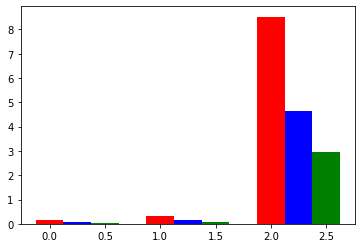

In [82]:
X = np.arange(3)

plt.bar(X + 0.00, cat1_comp, color='r', width=0.25)
plt.bar(X + 0.25, cat2_comp, color='b', width=0.25)
plt.bar(X + 0.50, cat3_comp, color='g', width=0.25)

## Extraction Reply

In [95]:
youtube = build(api_service_name, api_ver, developerKey = dev_key)

reviews = []

for i in range(len(dtcu_df)):
    cm = youtube.commentThreads().list(
        videoId = dtcu_df['IDS'][i],
        order = 'relevance',
        part = 'snippet',
        maxResults = 100
    ).execute()
    for i in cm['items']:
        reviews.append(i['snippet']['topLevelComment']['snippet']['textOriginal'])

adf = pd.DataFrame(reviews, columns=['Comments'])
adf

Comments
0    ÏöîÏ¶òÏùÄ Ï†ïÎßê ÌïúÏãùÏù¥ ÎßéÏïÑÏ†∏ÏÑú~ÏÇ¨Ïã§ ÎßõÏûàÎäîÍ≥≥ÎèÑ ÎßéÏïÑÏÑú Ïú†ÌïôÏÉùÌôú Ìï†Îïå Ï∞∏ ÎèÑÏõÄÏù¥ ÎßéÏù¥ ...
1    ÏòÅÏÉÅ Ìï≠ÏÉÅ Ïûò Î≥¥Í≥†ÏûàÏäµÎãàÎã§ :) Ïù¥Î≤à ÏòÅÏÉÅÏùÄ bgmÏù¥ ÎÑàÎ¨¥ Ï¢ãÏïÑÏÑú Ï∞æÏïÑÎ¥§ÎÑ§Ïöî„Öé„Öé Îçï...
2                              ÌôîÏù¥ÌåÖÏûÖÎãàÎã§ Ìï≠ÏÉÅ Ï±ôÍ≤®Î≥¥Î©¥ÏÑú ÏùëÏõêÌïòÍ≥†ÏûàÏñ¥Ïöî
3                                            Îã¨ÎùºÏä§ ÌÅ¥ÎùºÏì∞ ü§≠
4                                      ÏÇ¨Ïã§ ÌïúÍµ≠ Ïñ¥ÎîòÍ∞ÄÏóê ÏûàÏóàÎã§Îäî
..                                                 ...
415                                         ÌòïÎãò Í∞êÏÇ¨Ìï©ÎãàÎã§!!
416                ÌòπÏãú Î∞ïÏÇ¨ÏÉùÏù¥ÏãúÎ©¥ ÌÖçÏÇ¨Ïä§ ÏßÄÏó≠ Ïä§Ìä∏ÎùºÏù¥ÌéúÎìú ÏñºÎßàÏ†ïÎèÑ Î∞õÏúºÏÑ∏Ïöî??
417  ÏôÄ Ï†ïÎßê Ï†ÅÍ≤å Ïì∞ÏãúÎÑ§Ïöî!! ÎåÄÌïôÏõêÏÉùÌôúÌïòÎ©¥ÏÑú ÏÇ¥Î¶ºÏù¥ Í∞ÄÎä•ÌïòÏã†Í∞ÄÏö©?? Ï†ÄÎäî Îß®ÎÇ† ÏÇ¨Î®πÍ±∞...
418               Ïä§ÌÉÄÎ≤ÖÏä§Îäî Ï†ïÎßê Íµ≠Î£∞Ïù¥Íµ∞Ïöî..„Öã„Öã„Öã„Öã„Öã Ïª§ÌîºÎßåÏùÄ Ìè¨Í∏∞Î™ªÌï¥.....
419                                    ÏûêÎßâ ÎÑ£ÏúºÎ©¥ Ï¢ÄÎçî Ï¢ãÏùÑÎìØ „Öé

[420 rows x 1 columns]

In [96]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  420 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


## Pre-processing

In [97]:
#!pip install konlpy
#!pip install collections
#!pip install wordcloud
from konlpy.tag import Hannanum
from collections import Counter
from wordcloud import WordCloud
import re

In [98]:
font_path_input = 'C:/Windows/Fonts/malgun.ttf'

In [99]:
texts = ''
for i in list(adf['Comments']):
    texts += i
#texts

In [100]:
# Cleansing Emoji
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Cleansing phrases that compromise the analysis
han = re.compile(r'[„Ñ±-„Öé„Öè-„Ö£!?~,".\n\r#\ufeff\u200d]')

comment_result = []
str_result = ''
for i in texts:
    tokens = re.sub(emoji_pattern, "", i)
    tokens = re.sub(han, "", tokens)
    str_result += tokens
    comment_result.append(tokens)
#str_result

## WordCloud Generating

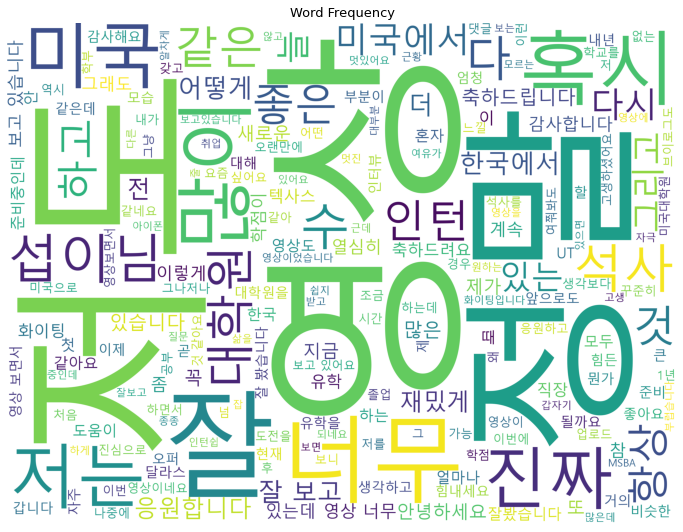

In [101]:
wordcloud = WordCloud(font_path=font_path_input, background_color='white', width=3200, height=2400)
cloud = wordcloud.generate(str_result)
plt.figure(figsize = (12, 12)) # ÏµúÏ¢Ö ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
plt.imshow(cloud)
plt.title("Word Frequency", size = 13)
plt.axis('off')
plt.show()

## Text Mining

In [102]:
comment_result = []

for i in adf:
    tokens = re.sub(emoji_pattern,"",i)
    tokens = re.sub(han,"",tokens)
    comment_result.append(tokens)

comment_result = pd.DataFrame(reviews, columns=["Comments"])
#comment_result

In [103]:
from konlpy.tag import Twitter

def get_noun(comment_txt):
    twitter = Twitter()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['Comments'].apply(lambda x: get_noun(x))
comment_result['token']

0          [ÏöîÏ¶ò, Ï†ïÎßê, ÌïúÏãù, ÏÇ¨Ïã§, Í≥≥ÎèÑ, Ïú†Ìïô, ÏÉùÌôú, Îïå, ÎèÑÏõÄ]
1      [ÏòÅÏÉÅ, Ìï≠ÏÉÅ, Ïù¥Î≤à, ÏòÅÏÉÅ, Ïù¥, ÎçïÎ∂Ñ, ÏùåÏïÖ, ÌïòÎÇò, Ïïå, ÌôîÏù¥ÌåÖ]
2                                [ÌôîÏù¥ÌåÖ, Ìï≠ÏÉÅ, ÏùëÏõê]
3                                        [Îã¨ÎùºÏä§]
4                                [ÏÇ¨Ïã§, ÌïúÍµ≠, Ïñ¥ÎîòÍ∞Ä]
                        ...                   
415                                       [ÌòïÎãò]
416    [ÌòπÏãú, Î∞ïÏÇ¨, ÏÉù, Ïãú, ÌÖçÏÇ¨Ïä§, ÏßÄÏó≠, Ïä§Ìä∏ÎùºÏù¥ÌéúÎìú, ÏñºÎßà, Ï†ïÎèÑ]
417                       [Ï†ïÎßê, ÎåÄÌïôÏõê, ÏÉùÌôú, ÏÇ¥Î¶º, Ï†Ä]
418                 [Ïä§ÌÉÄÎ≤ÖÏä§, Ï†ïÎßê, Íµ≠Î£∞, Ïù¥Íµ∞, Ïª§Ìîº, Ìè¨Í∏∞]
419                                   [ÏûêÎßâ, Ï¢ÄÎçî]
Name: token, Length: 420, dtype: object

In [120]:
vec = []
for i in range(len(comment_result)):
    vec2 = []
    tm_ls = comment_result['token'].iloc[i]
    if len(tm_ls) == 0: # Deleting the empty list
        pass
    else:
        for j in range(len(tm_ls)): # Passing  
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)
#vec

In [106]:
#!pip install -U gensim
from gensim.models import Word2Vec
import ast

model = Word2Vec(vec, min_count=3,window=3, epochs=20, vector_size=100, sg=1) #skip-gram

In [107]:
model.wv.most_similar('ÌïôÍµê', 'ÏñºÎßàÎÇò')

[('Ìá¥ÏÇ¨', 0.008374077267944813),
 ('Î¨∏Ïùò', 0.007368134334683418),
 ('ÌïôÏÉù', 0.007361247669905424),
 ('ÏßÄÏó≠', 0.007283541839569807),
 ('Î∞ïÏÇ¨', 0.007145814131945372),
 ('Î™áÍ∞ú', 0.007021912839263678),
 ('ÎåÄÌïôÍµê', 0.004658940248191357),
 ('Îã¨ÎùºÏä§', 0.0034577336627990007),
 ('ÏùºÏ£ºÏùº', 0.0033754329197108746),
 ('ÌÖçÏÇ¨Ïä§', 0.003234833711758256)]

In [108]:
model.wv.most_similar('ÎØ∏Íµ≠', 'Ïù∏ÌÑ¥')

[('ÍµøÍµø', 0.023527106270194054),
 ('ÎçïÎ∂Ñ', 0.01032508909702301),
 ('Î™áÍ∞ú', 0.010022306814789772),
 ('ÏûêÍ∑π', 0.009284807369112968),
 ('Î≥¥Í≥†', 0.008093105629086494),
 ('ÌïôÍµê', 0.007489618845283985),
 ('ÏÇ¨Îûå', 0.007390706334263086),
 ('Í¥ÄÏã¨', 0.007364529184997082),
 ('ÌÜ†Ìîå', 0.0070424494333565235),
 ('Î∞òÏÑ±', 0.006269247271120548)]

In [113]:
from sklearn.cluster import KMeans
model.wv.vectors #w2v size  -> 236 words, 100 dimensions

#45 words are inserted and tranformed(vectorized) at 100 dimensions
word_vectors = model.wv.vectors

print('datasets words count:', len(word_vectors))

datasets words count: 236


In [121]:
num_clusters = 10 #cluster (between 6 ~ 10)
kmeans_clustering = KMeans( n_clusters = num_clusters ) #default

idx = kmeans_clustering.fit_predict( word_vectors ) # Check each words' cluster numbers
idx

array([7, 2, 7, 7, 2, 7, 7, 3, 2, 7, 2, 7, 2, 7, 7, 7, 2, 2, 2, 2, 7, 3,
       2, 9, 7, 2, 5, 7, 2, 2, 3, 2, 7, 2, 3, 7, 7, 3, 2, 7, 3, 7, 3, 0,
       9, 3, 3, 7, 9, 3, 2, 7, 3, 9, 0, 7, 7, 3, 3, 3, 0, 3, 7, 0, 2, 7,
       3, 3, 0, 3, 3, 2, 7, 7, 2, 7, 4, 7, 3, 3, 3, 0, 2, 2, 7, 3, 0, 2,
       7, 4, 0, 3, 2, 0, 3, 4, 7, 9, 3, 3, 2, 2, 3, 3, 7, 2, 2, 3, 5, 5,
       3, 0, 2, 7, 5, 5, 9, 4, 0, 5, 5, 5, 7, 3, 0, 7, 0, 4, 0, 2, 4, 4,
       5, 1, 0, 0, 0, 4, 3, 0, 7, 2, 3, 0, 0, 8, 3, 0, 0, 5, 4, 5, 6, 2,
       3, 5, 0, 5, 5, 1, 0, 7, 6, 3, 4, 4, 4, 1, 0, 6, 1, 1, 6, 5, 1, 5,
       4, 0, 7, 5, 8, 5, 7, 0, 3, 5, 0, 5, 0, 1, 7, 5, 7, 0, 8, 0, 8, 5,
       0, 1, 3, 0, 3, 5, 8, 5, 6, 7, 5, 0, 0, 4, 0, 6, 1, 4, 5, 8, 4, 9,
       8, 0, 4, 3, 8, 5, 0, 1, 4, 8, 0, 5, 8, 4, 4, 0])

In [122]:
# Establishing word/Index dictionary to map each words to cluster number each
idx = list(idx)
names = model.wv.index_to_key #learned unique words
word_centroid_map = {names[i]: idx[i] for i in range(len(names))} # Matching cluster numbers
#word_centroid_map

In [123]:
for cluster in range(0,10):
    # print out the cluster numbers
    print("\nCluster {}".format(cluster))
    
    # Pick Cluster numbers and words in it
    words = []
    for i in range(0,len(list(word_centroid_map.values()))): # return list(dict)'s key value
        #list(dict.values) is returning <list> of value
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['Î™®Ïäµ', 'Ïó≠Ïãú', 'ÌïôÏÉù', 'ÎèôÍ∏∞Î∂ÄÏó¨', 'Í≥ÑÏÜç', 'Ïö∞Î¶¨', 'ÏßÅÏû•Ïù∏', 'Ïù∏ÌÑ¥ÏâΩ', 'ÏöîÏ¶ò', 'ÏÉÅÏù¥', 'ÏãúÍ∏∞', 'Í¥ÄÏã¨', 'ÌÜ†Ìîå', 'Ï†ïÎ¶¨', 'ÏÇ¨Ïãú', 'Í∞ëÏûêÍ∏∞', 'ÎÇòÏ§ë', 'Í¥ÄÎ†®', 'ÌôúÏö©', 'ÎßàÎ¨¥Î¶¨', 'Ïó¨Îü¨', 'Í∑∏ÎÉ•', 'ÎßåÏ°±', 'Í∏∞Ìöå', 'Ï†ÄÎ≤à', 'ÌñâÏÇ¨', 'Í∞ÄÏùÑ', 'ÎïÖÏΩ©', 'Ïò¨Ìï¥', 'ÎÇ¥Ïö©', 'Ïó∞ÎùΩ', 'Ï£ºÌñâ', 'ÌïôÏõê', 'Í≥µÏú†', 'Í∞úÏù∏', 'ÏÇ¨ÏÉù', 'Ïù¥Î©îÏùº', 'Í≥†Î†§', 'Í∏∞Ïñµ', 'Ï∂úÎ∞ú']

Cluster 1
['ÏàòÍ≥†', 'Ïù∏ÏÉù', 'ÌïÑÎùºÎç∏ÌîºÏïÑ', 'ÏïÑÏù¥Ìè∞', 'ÌÉÄÏßÄ', 'Í∏∞ÎèÑ', 'ÎèÑÏ∞©', 'ÎåÄÌïôÍµê', 'ÏùºÏÉÅ', 'Í∏∞Ïö¥']

Cluster 2
['ÎØ∏Íµ≠', 'ÏùëÏõê', 'ÏÉùÍ∞Å', 'ÌòπÏãú', 'ÏÑùÏÇ¨', 'ÌïôÍµê', 'Ïú†Ìïô', 'ÏÉùÌôú', 'ÌïúÍµ≠', 'ÌÖçÏÇ¨Ïä§', 'Í≥†ÎØº', 'ÏßÅÏû•', 'Í±±Ï†ï', 'Ï°∏ÏóÖ', 'ÏßÄÏõê', 'Îã§Ïãú', 'ÎÇ¥ÎÖÑ', 'ÏòÅÏñ¥', 'ÏûêÏ£º', 'Ïú†ÌïôÏÉù', 'Í∏∞Î∂Ñ', 'Í∞ÄÏßÄ', 'ÌïúÎ≤à', 'Ïó¨Ïú†', 'ÎåÄÌï¥', 'ÏÉùÌôúÎπÑ', 'Ïó¨Í∏∞', 'ÌïôÎπÑ', 'ÏúÑÌï¥', 'ÎπÑÏö©', 'ÌòÑÏã§', 'Ï°∞Í∏à']

Cluster 3
['Ï∂ïÌïò', 'Í≥†ÏÉù', 'Ìï©Í≤©', 'ÌïôÍ∏∞', 'ÎåìÍ∏Ä', 'Ïù¥Î≤à', 'ÏãúÏûë', 'Îã¨ÎùºÏä§', 'ÎèÑ